# Titanic project

## import libraries

In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

## load dataset

In [196]:
df= sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [197]:
df.shape

(891, 15)

In [198]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [199]:
df.index.duplicated().all()

False

In [200]:
df.columns.duplicated().all()

False

## creat data dictionary

* ###  check Data Types

In [201]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [202]:
{ col: df[col].nunique() for col in df if df[col].dtype == object}

{'sex': 2, 'embarked': 3, 'who': 3, 'embark_town': 3, 'alive': 2}

In [203]:
df["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [204]:
df["embark_town"].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [205]:
df = df.astype(
                { 
                    "sex":"category",
                    "embarked":"category",
                    "who":"category",
                    "embark_town":"category",
                    "alive":"category",     
                }
)
df.dtypes

survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male         bool
deck           category
embark_town    category
alive          category
alone              bool
dtype: object

In [206]:
datadict = pd.DataFrame(df.dtypes, columns=["dtypes"], dtype=str)
datadict

,dtypes
survived,int64
pclass,int64
sex,category
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,category
class,category
who,category


In [207]:
datadict[datadict["dtypes"]== "category"]

,dtypes
sex,category
embarked,category
class,category
who,category
deck,category
embark_town,category
alive,category


In [208]:
datadict[datadict["dtypes"].str.contains("int")]

,dtypes
survived,int64
pclass,int64
sibsp,int64
parch,int64


In [209]:
datadict[datadict["dtypes"] =="bool"]

,dtypes
adult_male,bool
alone,bool


* ### definations

In [210]:
datadict["definations"] = [
                                    "Survival",
                                     "A proxy for socio-economic status (SES)",
                                     "Sex" ,
                                     "Age in years" ,
                                     "# of siblings(brother, sister) and spouses ( husband, wife )",
                                     '# of parents / children aboard the Titanic',
                                     'Passenger fare',
                                     'Port of Embarkation', 
                                     "class", 
                                     "sex",
                                     'is adult' ,
                                     'deck',
                                    'Port of Embarkation',
                                    'Survival',
                                    'is alone'

]
datadict

,dtypes,definations
survived,int64,Survival
pclass,int64,A proxy for socio-economic status (SES)
sex,category,Sex
age,float64,Age in years
sibsp,int64,"# of siblings(brother, sister) and spouses ( h..."
parch,int64,# of parents / children aboard the Titanic
fare,float64,Passenger fare
embarked,category,Port of Embarkation
class,category,class
who,category,sex


* ### check missing value

In [211]:
datadict["missingVal"] = df.isnull().sum()
datadict

,dtypes,definations,missingVal
survived,int64,Survival,0
pclass,int64,A proxy for socio-economic status (SES),0
sex,category,Sex,0
age,float64,Age in years,177
sibsp,int64,"# of siblings(brother, sister) and spouses ( h...",0
parch,int64,# of parents / children aboard the Titanic,0
fare,float64,Passenger fare,0
embarked,category,Port of Embarkation,2
class,category,class,0
who,category,sex,0


In [212]:
datadict["%missingVal"]= (datadict["missingVal"] / df.shape[0])* 100
datadict

,dtypes,definations,missingVal,%missingVal
survived,int64,Survival,0,0.000000
pclass,int64,A proxy for socio-economic status (SES),0,0.000000
sex,category,Sex,0,0.000000
age,float64,Age in years,177,19.865320
sibsp,int64,"# of siblings(brother, sister) and spouses ( h...",0,0.000000
parch,int64,# of parents / children aboard the Titanic,0,0.000000
fare,float64,Passenger fare,0,0.000000
embarked,category,Port of Embarkation,2,0.224467
class,category,class,0,0.000000
who,category,sex,0,0.000000


In [213]:
df["deck"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

* ### check number unique value

In [214]:
datadict["Nunique"] = df.nunique()
datadict

,dtypes,definations,missingVal,%missingVal,Nunique
survived,int64,Survival,0,0.000000,2
pclass,int64,A proxy for socio-economic status (SES),0,0.000000,3
sex,category,Sex,0,0.000000,2
age,float64,Age in years,177,19.865320,88
sibsp,int64,"# of siblings(brother, sister) and spouses ( h...",0,0.000000,7
parch,int64,# of parents / children aboard the Titanic,0,0.000000,7
fare,float64,Passenger fare,0,0.000000,248
embarked,category,Port of Embarkation,2,0.224467,3
class,category,class,0,0.000000,3
who,category,sex,0,0.000000,3


In [215]:
df["who"].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

> TODO: add is child column  to df

* ### check count of each column

In [216]:
datadict["Count"] = df.count()
datadict

,dtypes,definations,missingVal,%missingVal,Nunique,Count
survived,int64,Survival,0,0.000000,2,891
pclass,int64,A proxy for socio-economic status (SES),0,0.000000,3,891
sex,category,Sex,0,0.000000,2,891
age,float64,Age in years,177,19.865320,88,714
sibsp,int64,"# of siblings(brother, sister) and spouses ( h...",0,0.000000,7,891
parch,int64,# of parents / children aboard the Titanic,0,0.000000,7,891
fare,float64,Passenger fare,0,0.000000,248,891
embarked,category,Port of Embarkation,2,0.224467,3,889
class,category,class,0,0.000000,3,891
who,category,sex,0,0.000000,3,891


## Quick look at descriptive statistics

In [217]:
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


* **survived :** my data is reletviley imbalance
* **age :** titanic data peoples age is between 0.42 and 80. age distribuation is probably normal

In [218]:
df.describe(include="category").T

,count,unique,top,freq
sex,891,2,male,577
embarked,889,3,S,644
class,891,3,Third,491
who,891,3,man,537
deck,203,7,C,59
embark_town,889,3,Southampton,644
alive,891,2,no,549


## discover the data to get insights

In [219]:
titanic = df.copy()

In [220]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### looking for correlations 

In [221]:
corrdf = titanic.corr(numeric_only= True)

In [222]:
corrdf.abs().style.background_gradient(cmap="Greens")

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,0.338481,0.077221,0.035322,0.081629,0.257307,0.557080,0.203367
pclass,0.338481,1.000000,0.369226,0.083081,0.018443,0.549500,0.094035,0.135207
age,0.077221,0.369226,1.000000,0.308247,0.189119,0.096067,0.280328,0.198270
sibsp,0.035322,0.083081,0.308247,1.000000,0.414838,0.159651,0.253586,0.584471
parch,0.081629,0.018443,0.189119,0.414838,1.000000,0.216225,0.349943,0.583398
fare,0.257307,0.549500,0.096067,0.159651,0.216225,1.000000,0.182024,0.271832
adult_male,0.557080,0.094035,0.280328,0.253586,0.349943,0.182024,1.000000,0.404744
alone,0.203367,0.135207,0.198270,0.584471,0.583398,0.271832,0.404744,1.000000


In [223]:
corrdf.abs().style.highlight_min(axis=0)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,0.338481,0.077221,0.035322,0.081629,0.257307,0.557080,0.203367
pclass,0.338481,1.000000,0.369226,0.083081,0.018443,0.549500,0.094035,0.135207
age,0.077221,0.369226,1.000000,0.308247,0.189119,0.096067,0.280328,0.198270
sibsp,0.035322,0.083081,0.308247,1.000000,0.414838,0.159651,0.253586,0.584471
parch,0.081629,0.018443,0.189119,0.414838,1.000000,0.216225,0.349943,0.583398
fare,0.257307,0.549500,0.096067,0.159651,0.216225,1.000000,0.182024,0.271832
adult_male,0.557080,0.094035,0.280328,0.253586,0.349943,0.182024,1.000000,0.404744
alone,0.203367,0.135207,0.198270,0.584471,0.583398,0.271832,0.404744,1.000000


In [224]:
corrdf.abs().style.highlight_max(axis=0)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,0.338481,0.077221,0.035322,0.081629,0.257307,0.557080,0.203367
pclass,0.338481,1.000000,0.369226,0.083081,0.018443,0.549500,0.094035,0.135207
age,0.077221,0.369226,1.000000,0.308247,0.189119,0.096067,0.280328,0.198270
sibsp,0.035322,0.083081,0.308247,1.000000,0.414838,0.159651,0.253586,0.584471
parch,0.081629,0.018443,0.189119,0.414838,1.000000,0.216225,0.349943,0.583398
fare,0.257307,0.549500,0.096067,0.159651,0.216225,1.000000,0.182024,0.271832
adult_male,0.557080,0.094035,0.280328,0.253586,0.349943,0.182024,1.000000,0.404744
alone,0.203367,0.135207,0.198270,0.584471,0.583398,0.271832,0.404744,1.000000


In [225]:
mask = np.eye(len(corrdf), dtype=bool)
corrdf[mask] = np.nan
corrdf.abs().style.highlight_max(axis=0)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,nan,0.338481,0.077221,0.035322,0.081629,0.257307,0.557080,0.203367
pclass,0.338481,nan,0.369226,0.083081,0.018443,0.549500,0.094035,0.135207
age,0.077221,0.369226,nan,0.308247,0.189119,0.096067,0.280328,0.198270
sibsp,0.035322,0.083081,0.308247,nan,0.414838,0.159651,0.253586,0.584471
parch,0.081629,0.018443,0.189119,0.414838,nan,0.216225,0.349943,0.583398
fare,0.257307,0.549500,0.096067,0.159651,0.216225,nan,0.182024,0.271832
adult_male,0.557080,0.094035,0.280328,0.253586,0.349943,0.182024,nan,0.404744
alone,0.203367,0.135207,0.198270,0.584471,0.583398,0.271832,0.404744,nan


In [226]:
corrdf["survived"].abs().sort_values(ascending=False)

adult_male    0.557080
pclass        0.338481
fare          0.257307
alone         0.203367
parch         0.081629
age           0.077221
sibsp         0.035322
survived           NaN
Name: survived, dtype: float64

## checking missing values

In [227]:
datadict[["missingVal", "%missingVal"]].sort_values("missingVal", ascending= False)

,missingVal,%missingVal
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000


<Axes: >

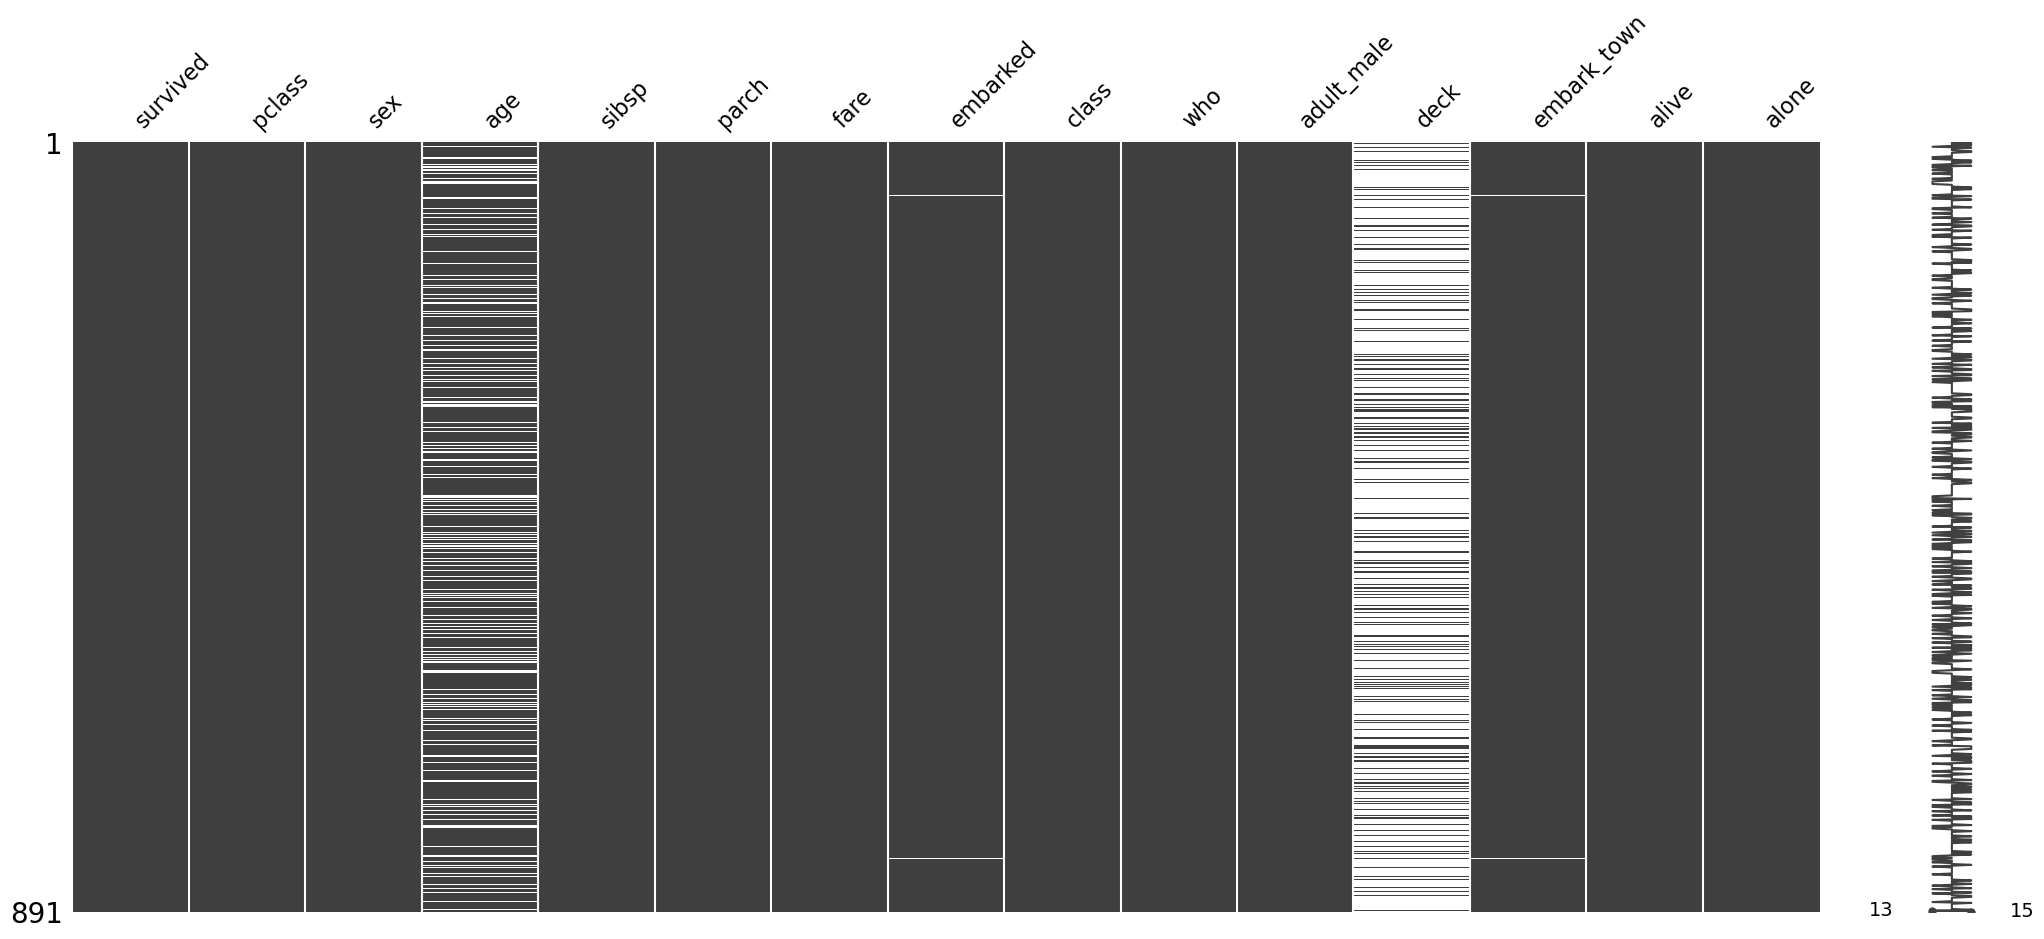

In [256]:
titanic.matrix(df)

In [231]:
titanic.drop("deck",axis="columns", inplace =True)

In [236]:
titanic[titanic["embarked"].isna()].index

Int64Index([61, 829], dtype='int64')

In [245]:
titanic.drop(titanic[titanic["embarked"].isna()].index, inplace=True)
titanic.reset_index(inplace= True)

In [246]:
titanic

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
885,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
886,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
887,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [250]:
(titanic["embark_town"].str.get(0) == titanic["embarked"]).all()

True

In [252]:
titanic.drop("embark_town",axis="columns", inplace =True)

In [253]:
titanic

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,no,True
885,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,yes,True
886,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,no,False
887,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,yes,True


<Axes: xlabel='age', ylabel='Count'>

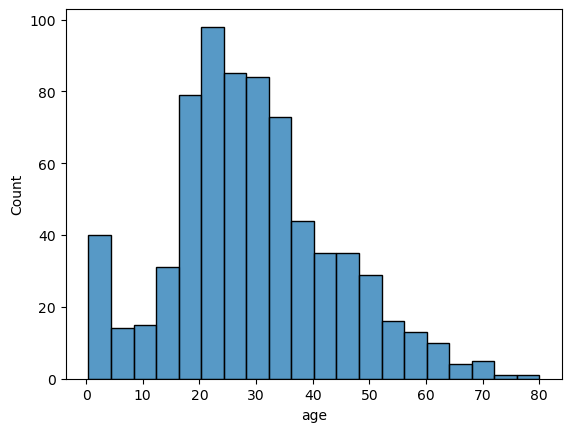

In [258]:
sns.histplot(titanic["age"])

<Axes: xlabel='age', ylabel='Count'>

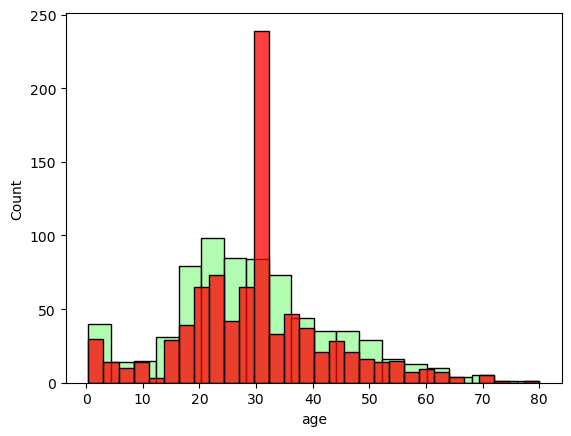

In [259]:
ax = sns.histplot(titanic.age,color="palegreen")
sns.histplot(titanic.age.fillna(titanic["age"].mean()),ax=ax,color="red")


In [263]:
corrdf["age"].abs().sort_values(ascending=False)

pclass        0.369226
sibsp         0.308247
adult_male    0.280328
alone         0.198270
parch         0.189119
fare          0.096067
survived      0.077221
age                NaN
Name: age, dtype: float64

In [268]:
titanic.groupby(["adult_male"]).age.transform("mean")

0      33.173123
1      24.764783
2      24.764783
3      24.764783
4      33.173123
         ...    
884    33.173123
885    24.764783
886    24.764783
887    33.173123
888    33.173123
Name: age, Length: 889, dtype: float64

In [270]:
titanic.fillna(titanic.groupby(["adult_male"]).age.transform("mean"))

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,no,True
885,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,yes,True
886,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,no,False
887,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,yes,True


<Axes: xlabel='age', ylabel='Count'>

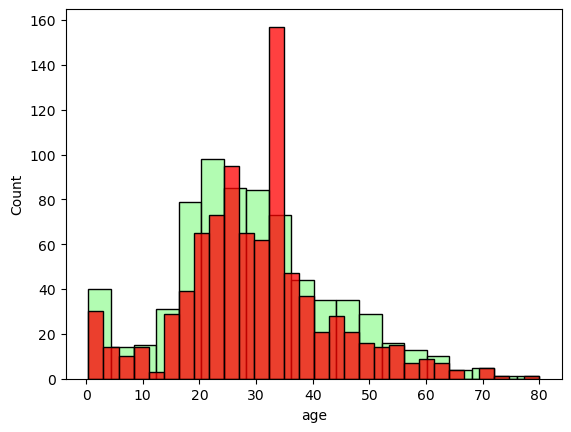

In [277]:
ax = sns.histplot(titanic.age,color="palegreen")
sns.histplot(titanic["age"].fillna(titanic.groupby(["adult_male" ]).age.transform("mean")),ax=ax,color="red")


In [279]:
titanic["age"].fillna(titanic.groupby(["adult_male" ]).age.transform("mean"), inplace=True)

In [284]:
titanic.isna().any()

index         False
survived      False
pclass        False
sex           False
age           False
sibsp         False
parch         False
fare          False
embarked      False
class         False
who           False
adult_male    False
alive         False
alone         False
dtype: bool